# Tutorial: CommonRoad Carla Traffic generation mode 
## Generating, Visualizing, and Writing CommonRoad Scenarios

This tutorial shows how CommonRoad Carla Traffic geration mode can be used, visualized, and stored. 

In [1]:
import time
from commonroad.scenario.trajectory import State
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output

# import classes and functions for reading xml file and visualizing commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.mp_renderer import MPRenderer

from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.mp_renderer import MPRenderer
from carlacr.carla_traffic_generation_mode import CarlaTrafficGenerationMode

pygame 2.0.3 (SDL 2.0.16, Python 3.7.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Import the map 

In [2]:
startTime = time.time()
traffic_generation = CarlaTrafficGenerationMode(open_drive_map_path="/home/hoaquin/Desktop/test.xodr")

## Auto generate a scenario

In [3]:
# you can reduce the carla_vehicles and the time_steps if you GPU is not really strong
traffic_generation.traffic_generate(carla_vehicles=150,time_steps=80)
executionTime = (time.time() - startTime)

print('Execution time in seconds: ' + str(executionTime))

Execution time in seconds: 35.54704308509827


## Visualize scenario with commonroad 

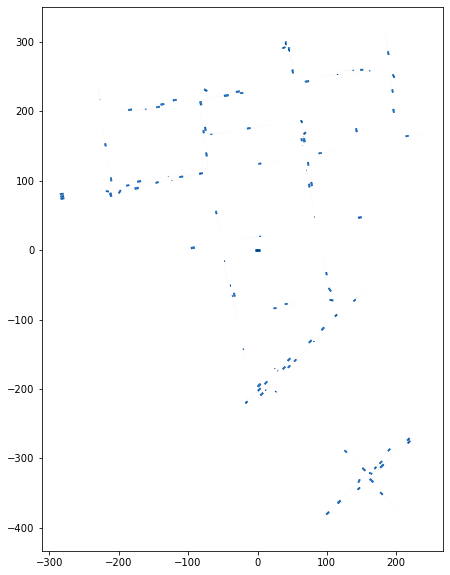

In [4]:
# plot the scenario for 40 time steps, here each time step corresponds to 0.1 second
for i in range(0, 40):
    plt.figure(figsize=(25, 10))
    renderer = MPRenderer()
    
    # uncomment the following line to visualize with animation
    clear_output(wait=True)
    
    # plot the scenario for each time step
    traffic_generation.scenario.draw(renderer, draw_params={'time_begin': i})

    renderer.render()
    plt.show()

In [5]:
#traffic_generation.visualize()